In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import pandas as pd
DATA=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\DATA.csv")
DATA

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,79,1985-01-02 22:58:04.594130,41.7150,13.9410,5.8,BULLETIN-VAX,NaN,NaN,NaN,Md,2.6,--,6 km S Civitella Alfedena (AQ)
1,89,1985-01-03 00:46:38.494130,41.6770,13.9310,6.1,BULLETIN-VAX,NaN,NaN,NaN,Md,2.5,--,6 km NE Picinisco (FR)
2,199,1985-01-04 16:58:01.744130,46.1580,7.1740,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.8,--,Confine Italia-Svizzera (SVIZZERA)
3,229,1985-01-05 00:00:16.324130,45.3380,6.6410,5.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.7,--,Confine Italia-Francia (FRANCIA)
4,239,1985-01-05 03:47:25.144130,45.4090,6.6270,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.2,--,Confine Italia-Francia (FRANCIA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181772,24334191,2020-04-29 11:17:45.674130,45.9167,12.1917,10.1,SURVEY-INGV,NaN,NaN,NaN,ML,1.7,--,2 km SW Refrontolo (TV)
181773,24335541,2020-04-29 14:15:09.474130,38.4090,13.5617,28.2,SURVEY-INGV,NaN,NaN,NaN,ML,2.3,--,Costa Siciliana centro-settentrionale (Palermo)
181774,24336421,2020-04-29 16:24:01.514130,42.8882,13.0363,10.0,SURVEY-INGV,NaN,NaN,NaN,ML,1.8,--,1 km N Preci (PG)
181775,24336481,2020-04-29 16:30:36.354130,37.7683,14.6293,38.0,SURVEY-INGV,NaN,NaN,NaN,ML,2.2,--,3 km SE Troina (EN)


0         1985-01-02 22:58:04.594130
1         1985-01-03 00:46:38.494130
2         1985-01-04 16:58:01.744130
3         1985-01-05 00:00:16.324130
4         1985-01-05 03:47:25.144130
                     ...            
181772    2020-04-29 11:17:45.674130
181773    2020-04-29 14:15:09.474130
181774    2020-04-29 16:24:01.514130
181775    2020-04-29 16:30:36.354130
181776    2020-04-29 19:21:21.794130
Name: Time, Length: 181777, dtype: object

(1.3, 6.7)

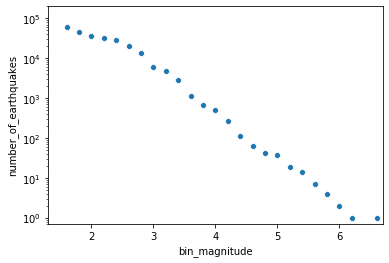

In [79]:
import math
binning=0.2
Mmin=2.1
#evaluation of maximum likelihood B^
magnitude=DATA['Magnitude']
#b=math.log10(math.exp(1)/(np.mean(magnitude)-(Mmin-binning/2)))
#b=math.log(1/(np.mean(magnitude)-(Mmin-binning/2))(math.log(10)) according to 'a non robust method to estimate the b value'
#plot Gutemberg-Richter
list_1=pd.Series([1 for i in range(181777)],name='1' )
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
bin_magnitude=np.add(bin_magnitude,0.1)
df1=pd.concat([bin_magnitude,number_of_earthquakes],axis=1)
df1.columns=['bin_magnitude','number_of_earthquakes']

plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.xlim((1.3, 6.7)) 
#explain influence of old catalogues

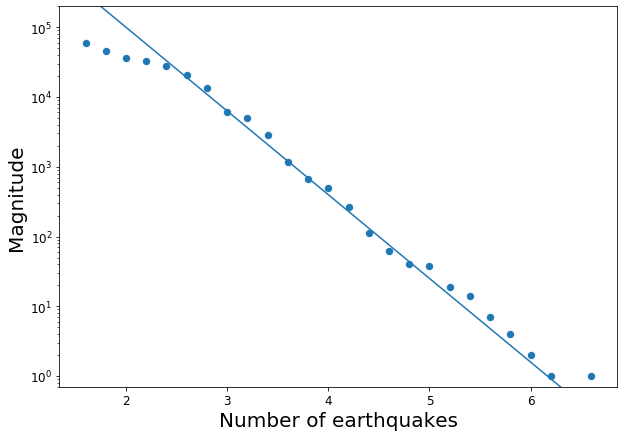

In [153]:
a_value=7.4
b=1.2
#b=math.log(1/((np.mean(magnitude)-(Mmin-binning/2))*(math.log(10))))# according to 'a non robust method to estimate the b value'
#b=math.log10(math.exp(1)/(np.mean(magnitude)-(Mmin-binning/2)))
Gutemberg_Richter=np.power(10,a_value-b*bin_magnitude) #here you can consider b or not
plt.figure(figsize=(10,7))
plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1,s=66)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.plot(bin_magnitude,Gutemberg_Richter)
plt.xlabel('Number of earthquakes',fontsize=20) #set font and title of x label
plt.ylabel('Magnitude',fontsize=20) #set font and title of y label
plt.tick_params(labelsize=12)

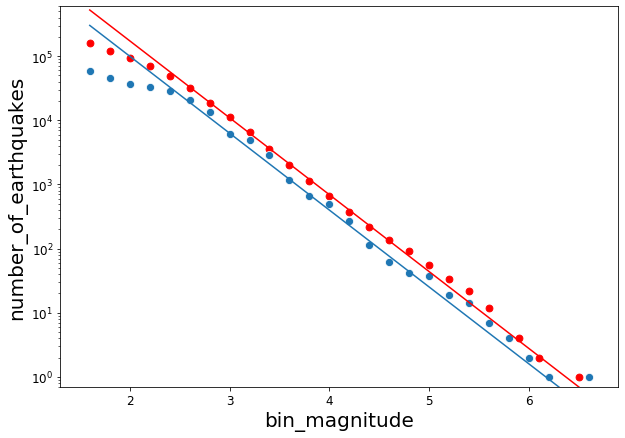

In [155]:
list_1=pd.Series([1 for i in range(181777)],name='1' )
a_value_cum=7.64
#another method
DATA_with_one=pd.concat(  [DATA,list_1],axis=1 )  

grouped=DATA_with_one.iloc[:,13].groupby(DATA['Magnitude'])
DATA['Magnitude'].sort_values(ascending=False) 
grouped_DATA_Magnitude=grouped.sum()
index_grouped_DATA_Magnitude=grouped_DATA_Magnitude.index
Gutemberg_Richter_cum=np.power(10,a_value_cum-b*bin_magnitude)
cum_series=pd.Series(np.add.accumulate(grouped_DATA_Magnitude.sort_index(ascending=False)))
#cum_ser_bin=[]
#for i in cum_series:
#    if
#    cum_ser_bin.append(i)
cum_series_1=[]
cum_series_1_index=[]
k=1
for i,z in zip(cum_series.index,cum_series):
    if k%2!=0 and k>2:
        pass
    else:
        cum_series_1_index.append([i])
        cum_series_1.append([z])
    k+=1
plt.figure(figsize=(10,7))    
plot=plt.scatter(cum_series_1_index,cum_series_1,s=46,color='red')
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 600000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.plot(bin_magnitude,Gutemberg_Richter_cum,color='red')
plt.xlabel('Number of earthquakes',fontsize=20) #set font and title of x label
plt.ylabel('Magnitude',fontsize=20) #set font and title of y label
plt.tick_params(labelsize=12)
plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1,s=66)
plt.plot(bin_magnitude,Gutemberg_Richter)

In [122]:
13%2

1